e:\CI\CI\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


AC Power: 50.00


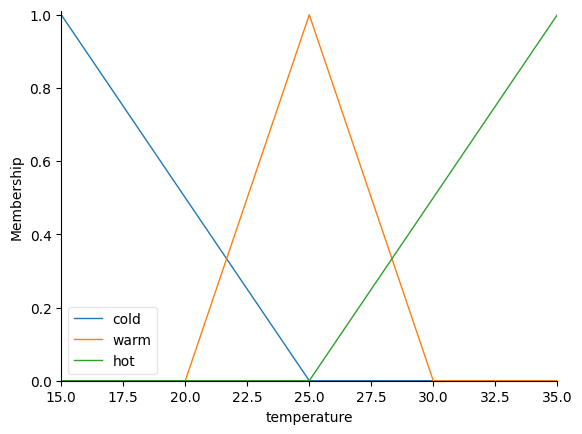

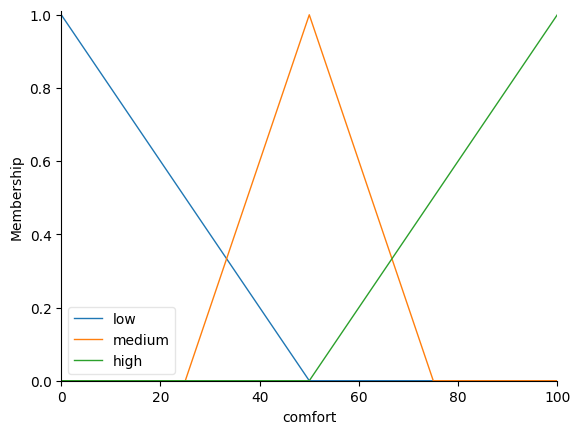

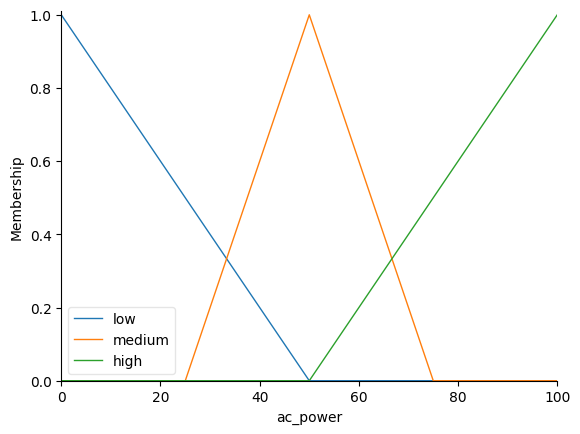

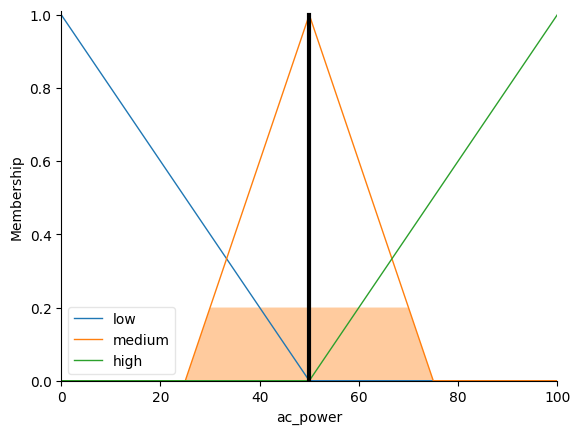

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define inputs
temperature = ctrl.Antecedent(np.arange(15, 36, 1), 'temperature')
comfort = ctrl.Antecedent(np.arange(0, 101, 1), 'comfort')

# Define output
ac_power = ctrl.Consequent(np.arange(0, 101, 1), 'ac_power')

# Define membership functions for temperature
temperature['cold'] = fuzz.trimf(temperature.universe, [15, 15, 25])
temperature['warm'] = fuzz.trimf(temperature.universe, [20, 25, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 35, 35])

# Define membership functions for comfort level
comfort['low'] = fuzz.trimf(comfort.universe, [0, 0, 50])
comfort['medium'] = fuzz.trimf(comfort.universe, [25, 50, 75])
comfort['high'] = fuzz.trimf(comfort.universe, [50, 100, 100])

# Define membership functions for AC power
ac_power['low'] = fuzz.trimf(ac_power.universe, [0, 0, 50])
ac_power['medium'] = fuzz.trimf(ac_power.universe, [25, 50, 75])
ac_power['high'] = fuzz.trimf(ac_power.universe, [50, 100, 100])

# Display membership functions
temperature.view()
comfort.view()
ac_power.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['cold'] & comfort['low'], ac_power['low'])
rule2 = ctrl.Rule(temperature['warm'] & comfort['medium'], ac_power['medium'])
rule3 = ctrl.Rule(temperature['hot'] & comfort['high'], ac_power['high'])

# Create fuzzy control system
ac_control = ctrl.ControlSystem([rule1, rule2, rule3])
ac_simulation = ctrl.ControlSystemSimulation(ac_control)

# Test the system
ac_simulation.input['temperature'] = 25
ac_simulation.input['comfort'] = 70

# Compute the output
ac_simulation.compute()

# Display the result
print(f"AC Power: {ac_simulation.output['ac_power']:.2f}")
ac_power.view(sim=ac_simulation)
